In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

dataset berupa data sinyal ekg yang terdiri dari subyek normal dan upnormal

In [ ]:
import pandas as pd

dataset = pd.read_csv('drive/MyDrive/Mecnit/EKG.csv')
dataset.head

<bound method NDFrame.head of        9.78E-01  9.26E-01  6.81E-01  ...  0.00E+00.86  0.00E+00.87   normal
0         0.960     0.863     0.462  ...          0.0          0.0   normal
1         1.000     0.659     0.186  ...          0.0          0.0   normal
2         0.925     0.666     0.541  ...          0.0          0.0   normal
3         0.967     1.000     0.831  ...          0.0          0.0   normal
4         0.927     1.000     0.627  ...          0.0          0.0   normal
...         ...       ...       ...  ...          ...          ...      ...
87548     0.807     0.495     0.537  ...          0.0          0.0  unknown
87549     0.718     0.605     0.487  ...          0.0          0.0  unknown
87550     0.906     0.624     0.596  ...          0.0          0.0  unknown
87551     0.858     0.646     0.846  ...          0.0          0.0  unknown
87552     0.902     0.846     0.801  ...          0.0          0.0  unknown

[87553 rows x 188 columns]>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier

In [ ]:
df = pd.read_csv("drive/MyDrive/Mecnit/EKG.csv",header=None)
names = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
, 'class']
df.columns = names
print(df.head(2))
print(df.info())
print(df.describe())

      t1     t2     t3     t4     t5  ...  t184  t185  t186  t187   class
0  0.978  0.926  0.681  0.245  0.154  ...   0.0   0.0   0.0   0.0  normal
1  0.960  0.863  0.462  0.197  0.094  ...   0.0   0.0   0.0   0.0  normal

[2 rows x 188 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, t1 to class
dtypes: float64(187), object(1)
memory usage: 125.6+ MB
None
                 t1            t2  ...          t186          t187
count  87554.000000  87554.000000  ...  87554.000000  87554.000000
mean       0.890360      0.758161  ...      0.002944      0.002807
std        0.240908      0.221812  ...      0.032865      0.031923
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.922000      0.682250  ...      0.000000      0.000000
50%        0.991000      0.826000  ...      0.000000      0.000000
75%        1.000000      0.911000  ...      0.000000      0.000000
max        1.000000      1.000000  ...      1.0

coding untuk mengecek data yang kosong.

In [ ]:
df.isnull().sum()

t1       0
t2       0
t3       0
t4       0
t5       0
        ..
t184     0
t185     0
t186     0
t187     0
class    0
Length: 188, dtype: int64

In [ ]:
def label_encode(df):
    df_labelled = df.copy()
    # Dictionary to input the different numbers for different classes
    label_encode = {"class": {"normal":0, "supraventricular ectopic":1, "ventricular ectopic":2, "fusion":3, "unknown":4}}

    # Use .replace to change the different classes into numbers
    df_labelled.replace(label_encode,inplace=True)
    return df_labelled

In [ ]:
x_values = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y_values = df['class']

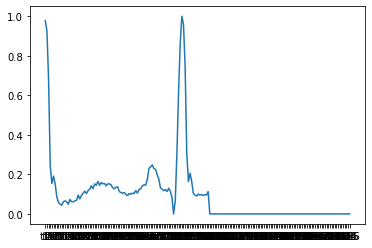

In [ ]:
plt.plot(df.iloc[0,:186])
#normal

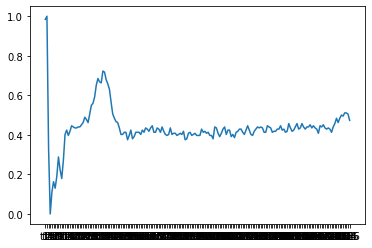

In [ ]:
plt.plot(df.iloc[72472,:186]) 
#supraventricular ectopic

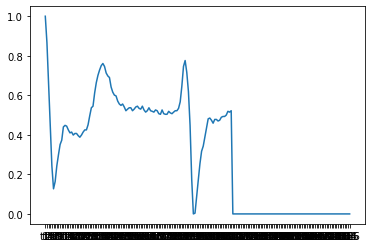

In [ ]:
plt.plot(df.iloc[74695,:186]) 
#ventricular ectopic

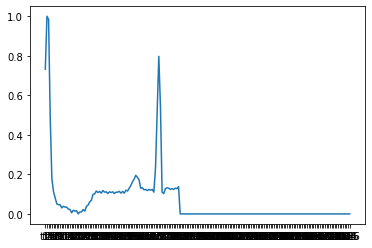

In [ ]:
plt.plot(df.iloc[80483,:186])
#fusion

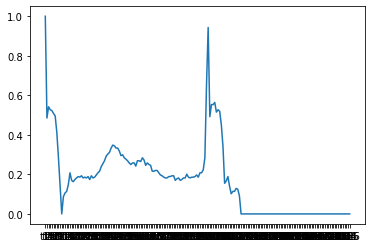

In [ ]:
plt.plot(df.iloc[81124,:186]) #unknown

Train and Test XGboost

In [ ]:
x_train, x_test, y_train, y_testXgBoost = train_test_split(x_values,y_values,test_size=0.3,random_state=10)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
#Train a XgBoost algorithm with the dataset.

gb_clf = XGBClassifier(learning_rate=0.3, n_estimator=100, subsample=1.0)
gb_clf.fit(x_train, y_train)

XGBClassifier(learning_rate=0.3, n_estimator=100, objective='multi:softprob',
              subsample=1.0)

In [ ]:
y_pred = gb_clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
matrix = (confusion_matrix(y_testXgBoost, y_pred))  
print(matrix)
benar = (matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])
Total = (matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]
         +matrix[1,0]+matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]
         +matrix[2,0]+matrix[2,1]+matrix[2,2]+matrix[2,3]+matrix[2,4]
         +matrix[3,0]+matrix[3,1]+matrix[3,2]+matrix[3,3]+matrix[3,4]
         +matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]+matrix[4,4])
print(benar)
print(Total)


akurasi = ((matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])/
           (matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]+matrix[1,0]
            +matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]+matrix[2,0]+matrix[2,1]
            +matrix[2,2]+matrix[2,3]+matrix[2,4]+matrix[3,0]+matrix[3,1]+matrix[3,2]
            +matrix[3,3]+matrix[3,4]+matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]
            +matrix[4,4])*100)
print(akurasi)

[[  128    47     0     0    12]
 [    1 21691    31    12    53]
 [    0   225   420     3     8]
 [    0    93     1  1786    12]
 [   10   211     3    13  1507]]
25532
26267
97.20181215974416


Predict XgBoost

In [ ]:
normalpredict = pd.read_csv("drive/MyDrive/Mecnit/predict normal2.csv")
Xgboost = XGBClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13',
        't14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25',
        't26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37',
        't38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49',
        't50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61',
        't62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73',
        't74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85',
        't86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97',
        't98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108',
        't109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119',
        't120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130',
        't131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141',
        't142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152',
        't153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163',
        't164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174',
        't175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

Xgboost = Xgboost.fit(x,y)

test = normalpredict
predictXGB = Xgboost.predict(test)

print(predictXGB)

['normal']


In [ ]:
SEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict supraventricular ectopic2.csv")

Xgboost = XGBClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x2 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
         't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
         't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
         't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
         't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
         't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
         't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
         't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
         't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
         't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
         't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
         't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
         't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
         't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
         't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
         't182','t183','t184','t185','t186','t187'
]]
y2 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
Xgboost = Xgboost.fit(x2,y2)

test = SEpredict
predictXGBSE = Xgboost.predict(test)

print(predictXGBSE)


['normal']


In [ ]:
VEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict ventricular ectopic2.csv")

Xgboost = XGBClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x3 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y3 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
Xgboost = Xgboost.fit(x3,y3)

test = VEpredict
predictXGBVE = Xgboost.predict(test)

print(predictXGBVE)

['fusion']


In [ ]:
fusionpredict = pd.read_csv("drive/MyDrive/Mecnit/predict fusion2.csv")

Xgboost = XGBClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x4 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y4 = df['class']


Xgboost = Xgboost.fit(x4,y4)

test = fusionpredict
predictXGBF = Xgboost.predict(test)

print(predictXGBF)

['fusion']


# Train and test (KNN)

In [ ]:
x_train, x_test, y_train, y_testKNN = train_test_split(x_values,y_values,test_size=0.3,random_state=10)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
#Train a K-Nearest Neighbours algorithm with the dataset.

KNN = KNeighborsClassifier(n_neighbors=3) 
KNN = KNN.fit(x_train_scale,y_train)


In [ ]:
y_predictKNN = KNN.predict(x_test_scale)

# Confusion matrix (K-NN)

In [ ]:
from sklearn.metrics import confusion_matrix  
matrix = (confusion_matrix(y_testKNN, y_predictKNN))  
print(matrix)
benar = (matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])
Total = (matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]
         +matrix[1,0]+matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]
         +matrix[2,0]+matrix[2,1]+matrix[2,2]+matrix[2,3]+matrix[2,4]
         +matrix[3,0]+matrix[3,1]+matrix[3,2]+matrix[3,3]+matrix[3,4]
         +matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]+matrix[4,4])
print(benar)
print(Total)


akurasi = ((matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])/
           (matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]+matrix[1,0]
            +matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]+matrix[2,0]+matrix[2,1]
            +matrix[2,2]+matrix[2,3]+matrix[2,4]+matrix[3,0]+matrix[3,1]+matrix[3,2]
            +matrix[3,3]+matrix[3,4]+matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]
            +matrix[4,4])*100)
print(akurasi)

[[  129    38     0     0    20]
 [   15 21617    57    14    85]
 [    1   190   456     0     9]
 [    0    55     0  1828     9]
 [   16   162    13     6  1547]]
25577
26267
97.37312978261697


# Akurasi

In [ ]:
akurasi = ((matrix[0,0]+matrix[1,1]+matrix[2,2]+matrix[3,3]+matrix[4,4])/
           (matrix[0,0]+matrix[0,1]+matrix[0,2]+matrix[0,3]+matrix[0,4]+matrix[1,0]
            +matrix[1,1]+matrix[1,2]+matrix[1,3]+matrix[1,4]+matrix[2,0]+matrix[2,1]
            +matrix[2,2]+matrix[2,3]+matrix[2,4]+matrix[3,0]+matrix[3,1]+matrix[3,2]
            +matrix[3,3]+matrix[3,4]+matrix[4,0]+matrix[4,1]+matrix[4,2]+matrix[4,3]
            +matrix[4,4])*100)
print(akurasi)

97.37312978261697


# Predict

In [ ]:
normalpredict = pd.read_csv("drive/MyDrive/Mecnit/predict normal2.csv")
KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13',
        't14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25',
        't26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37',
        't38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49',
        't50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61',
        't62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73',
        't74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85',
        't86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97',
        't98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108',
        't109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119',
        't120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130',
        't131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141',
        't142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152',
        't153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163',
        't164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174',
        't175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y = df['class']

knn = KNN.fit(x,y)

test = normalpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['normal']


In [ ]:
SEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict supraventricular ectopic2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x2 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
         't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
         't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
         't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
         't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
         't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
         't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
         't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
         't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
         't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
         't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
         't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
         't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
         't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
         't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
         't182','t183','t184','t185','t186','t187'
]]
y2 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x2,y2)

test = SEpredict
predictEKG = KNN.predict(test)

print(predictEKG)


['supraventicular ectopic']


In [ ]:
VEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict ventricular ectopic2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x3 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y3 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
knn = KNN.fit(x3,y3)

test = VEpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['fusion']


In [ ]:
fusionpredict = pd.read_csv("drive/MyDrive/Mecnit/predict fusion2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y = df['class']


knn = KNN.fit(x,y)

test = fusionpredict
predictEKG = KNN.predict(test)

print(predictEKG)

['fusion']


# Train and test (Decision tree)

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth = 15, min_samples_split = 7)
dt.fit(x_train_scale,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=7)

In [ ]:
y_predict = dt.predict(x_test_scale)

In [ ]:
x_train, x_test, y_train, y_testDT = train_test_split(x_values,y_values,test_size=0.3,random_state=10)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Confusion Matrix (Decision Tree)

In [ ]:
matrix2 = (confusion_matrix(y_testDT, y_predict))  
print(matrix2)
akurasi2 = ((matrix2[0,0]+matrix2[1,1]+matrix2[2,2]+matrix2[3,3]+matrix2[4,4])/
            (matrix2[0,0]+matrix2[0,1]+matrix2[0,2]+matrix2[0,3]+matrix2[0,4]+
             matrix2[1,0]+matrix2[1,1]+matrix2[1,2]+matrix2[1,3]+matrix2[1,4]+
             matrix2[2,0]+matrix2[2,1]+matrix2[2,2]+matrix2[2,3]+matrix2[2,4]+
             matrix2[3,0]+matrix2[3,1]+matrix2[3,2]+matrix2[3,3]+matrix2[3,4]+
             matrix2[4,0]+matrix2[4,1]+matrix2[4,2]+matrix2[4,3]+matrix2[4,4])*100)
benar2 = (matrix2[0,0]+matrix2[1,1]+matrix2[2,2]+matrix2[3,3]+matrix2[4,4])
Total2 = (matrix2[0,0]+matrix2[0,1]+matrix2[0,2]+matrix2[0,3]+matrix2[0,4]+
          matrix2[1,0]+matrix2[1,1]+matrix2[1,2]+matrix2[1,3]+matrix2[1,4]+
          matrix2[2,0]+matrix2[2,1]+matrix2[2,2]+matrix2[2,3]+matrix2[2,4]+
          matrix2[3,0]+matrix2[3,1]+matrix2[3,2]+matrix2[3,3]+matrix2[3,4]+
          matrix2[4,0]+matrix2[4,1]+matrix2[4,2]+matrix2[4,3]+matrix2[4,4])
print(benar2)
print(Total2)


print(akurasi2)

[[   90    77     0     0    20]
 [   16 21551    55    42   124]
 [    1   264   376     5    10]
 [    1   138     4  1729    20]
 [   23   282     9    17  1413]]
25159
26267
95.7817794190429


Akurasi

In [ ]:
akurasi2 = ((matrix2[0,0]+matrix2[1,1]+matrix2[2,2]+matrix2[3,3]+matrix2[4,4])/(matrix2[0,0]+matrix2[0,1]+matrix2[0,2]+matrix2[0,3]+matrix2[0,4]+matrix2[1,0]+matrix2[1,1]+matrix2[1,2]+matrix2[1,3]+matrix2[1,4]+matrix2[2,0]+matrix2[2,1]+matrix2[2,2]+matrix2[2,3]+matrix2[2,4]+matrix2[3,0]+matrix2[3,1]+matrix2[3,2]+matrix2[3,3]+matrix2[3,4]+matrix2[4,0]+matrix2[4,1]+matrix2[4,2]+matrix2[4,3]+matrix2[4,4])*100)
print(akurasi2)

95.7817794190429


# predict

In [ ]:
normalpredict = pd.read_csv("drive/MyDrive/Mecnit/predict normal2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y = df['class']

DT = dt.fit(x,y)

normaltest = normalpredict
predictEKG = DT.predict(normaltest)

print(predictEKG)

['normal']


In [ ]:
SEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict supraventricular ectopic2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x1 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y1 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x1,y1)

SEtest = SEpredict
predictEKG = DT.predict(SEtest)

print(predictEKG)

['supraventicular ectopic']


In [ ]:
VEpredict = pd.read_csv("drive/MyDrive/Mecnit/predict ventricular ectopic2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x2 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14',
        't15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27',
        't28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40',
        't41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53',
        't54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66',
        't67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79',
        't80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92',
        't93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104',
        't105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115',
        't116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126',
        't127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137',
        't138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148',
        't149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159',
        't160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170',
        't171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181',
        't182','t183','t184','t185','t186','t187'
]]
y2 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x2,y2)

VEtest = VEpredict
predictEKG = DT.predict(VEtest)

print(predictEKG)

['normal']


In [ ]:
fusionpredict = pd.read_csv("drive/MyDrive/Mecnit/predict fusion2.csv")

KNN = KNeighborsClassifier()

# Extract out the x values and y values. x will be sepal_length and y will be classes
x3 = df[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29','t30','t31','t32','t33','t34','t35','t36','t37','t38','t39','t40','t41','t42','t43','t44','t45','t46','t47','t48','t49','t50','t51','t52','t53','t54','t55','t56','t57','t58','t59','t60','t61','t62','t63','t64','t65','t66','t67','t68','t69','t70','t71','t72','t73','t74','t75','t76','t77','t78','t79','t80','t81','t82','t83','t84','t85','t86','t87','t88','t89','t90','t91','t92','t93','t94','t95','t96','t97','t98','t99','t100','t101','t102','t103','t104','t105','t106','t107','t108','t109','t110','t111','t112','t113','t114','t115','t116','t117','t118','t119','t120','t121','t122','t123','t124','t125','t126','t127','t128','t129','t130','t131','t132','t133','t134','t135','t136','t137','t138','t139','t140','t141','t142','t143','t144','t145','t146','t147','t148','t149','t150','t151','t152','t153','t154','t155','t156','t157','t158','t159','t160','t161','t162','t163','t164','t165','t166','t167','t168','t169','t170','t171','t172','t173','t174','t175','t176','t177','t178','t179','t180','t181','t182','t183','t184','t185','t186','t187'
]]
y3 = df['class']

# Train KNN using the x and y values. This is done through the .fit method.
DT = dt.fit(x3,y3)

fusiontest = fusionpredict
predictEKG = DT.predict(fusiontest)

print(predictEKG)

['fusion']
